<a href="https://colab.research.google.com/github/Optimized-Brain/Ising-Model-for-Market-Crash/blob/main/isingModelForMarketCrash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

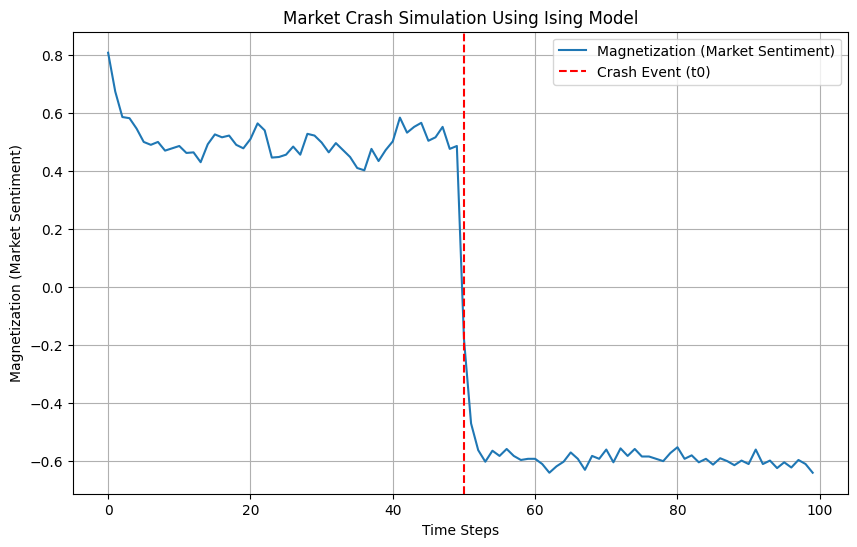

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents (spins)
J = 1.0  # Interaction strength (herding behavior)
T = 2.2  # Temperature (market uncertainty)
h0 = 0.5  # Initial external field (positive sentiment)
h1 = -1.5  # Shocked external field (negative sentiment, bad news)
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 50  # Time step when shock happens
steps = 100  # Number of simulation steps

# Initialize agents (spins), starting with bullish market (all +1)
spins = np.ones(N)

# Function to calculate the total energy of the system
def total_energy(spins, J, h):
    interaction_energy = -J * np.sum(spins[:-1] * spins[1:])  # Nearest-neighbor interaction
    external_field_energy = -h * np.sum(spins)  # Influence of external field
    return interaction_energy + external_field_energy

# Function to flip spin based on Metropolis-Hastings algorithm
def metropolis_step(spins, J, h, T):
    for i in range(N):
        # Choose a random spin
        rand_spin = np.random.randint(N)
        # Calculate energy difference if this spin is flipped
        delta_E = 2 * J * spins[rand_spin] * (spins[rand_spin - 1] + spins[(rand_spin + 1) % N]) + 2 * h * spins[rand_spin]
        # Metropolis criterion for accepting flip
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins[rand_spin] = -spins[rand_spin]  # Flip the spin

# Function to simulate the market
def simulate_market(J, h0, h1, T, lambda_initial, lambda_crash, t0, steps):
    magnetization = []
    lambda_t = lambda_initial  # Initial liquidity
    h = h0  # Start with positive market sentiment

    for t in range(steps):
        # Shock happens at t0: external field changes to h1, and liquidity crashes
        if t == t0:
            h = h1
            lambda_t = lambda_crash

        # Metropolis update (spin flips based on current temperature and external field)
        metropolis_step(spins, J, h, T)

        # Calculate the current magnetization (market sentiment)
        M = np.mean(spins)
        magnetization.append(M)

        # Liquidity amplifies the crash (lower liquidity makes the system more volatile)
        if t >= t0:
            J *= lambda_t  # Reducing interaction strength due to liquidity constraints

    return magnetization

# Run simulation
magnetization = simulate_market(J, h0, h1, T, lambda_initial, lambda_crash, t0, steps)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(magnetization, label="Magnetization (Market Sentiment)")
plt.axvline(x=t0, color='r', linestyle='--', label="Crash Event (t0)")
plt.title("Market Crash Simulation Using Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.show()


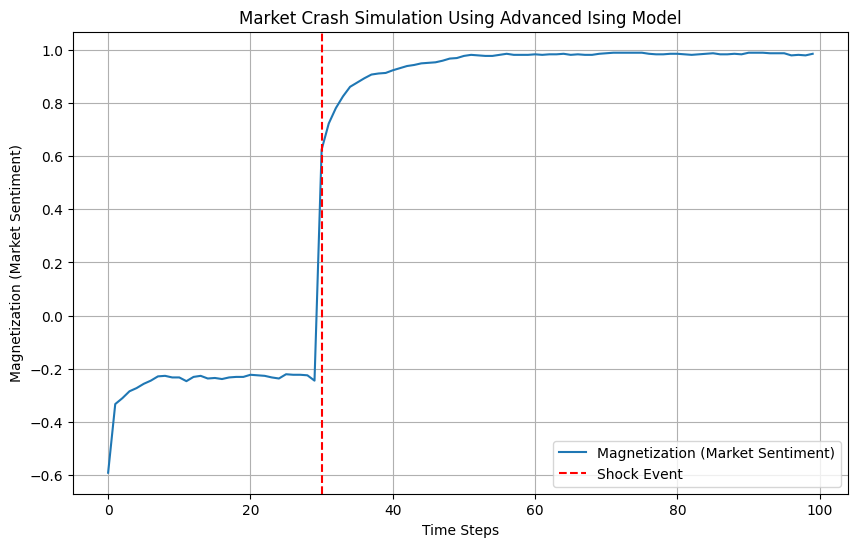

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -1.5  # Shocked external field
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 100  # Number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) and magnetization
spins = np.ones(N)
magnetization = []

# Function to calculate effective field
def effective_field(spins, h, J, lambda_t):
    m = np.mean(spins)
    return h + J * lambda_t * m

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        if t >= t0:
            h = h1
            lambda_t = lambda_crash
        else:
            h = h0

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Stochastic update of spins based on SDE
        for i in range(N):
            dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
            spins[i] += -1/tau * (H + J * np.sum(spins) / N) + np.sqrt(2 * D) * dW
            spins[i] = np.sign(spins[i])  # Project back to spin state (+1 or -1)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(magnetization, label="Magnetization (Market Sentiment)")
plt.axvline(x=t0, color='r', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.show()


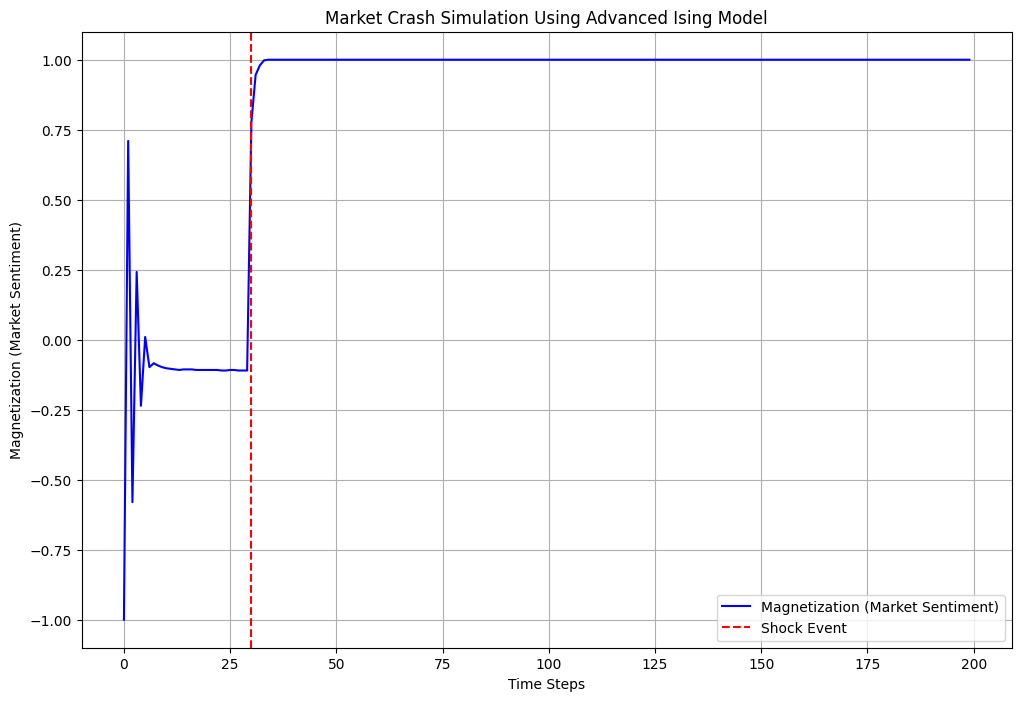

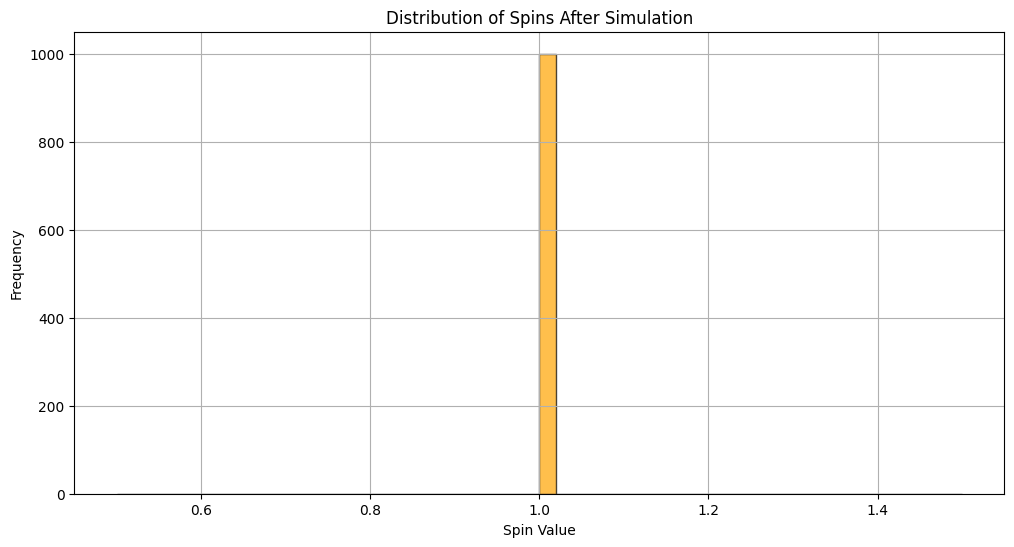

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -1.5  # Shocked external field
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Increased number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) and magnetization
spins = np.ones(N)
magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Stochastic update of spins based on SDE
        for i in range(N):
            dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
            spins[i] += -1/tau * H[i] + np.sqrt(2 * D) * dW
            spins[i] = np.sign(spins[i])  # Project back to spin state (+1 or -1)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


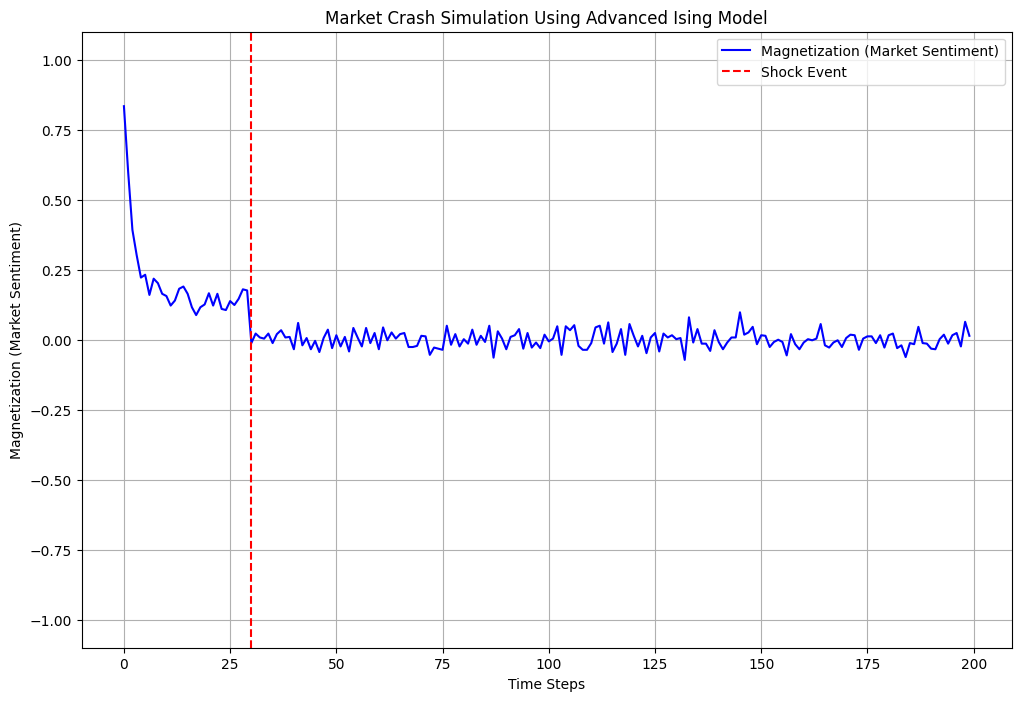

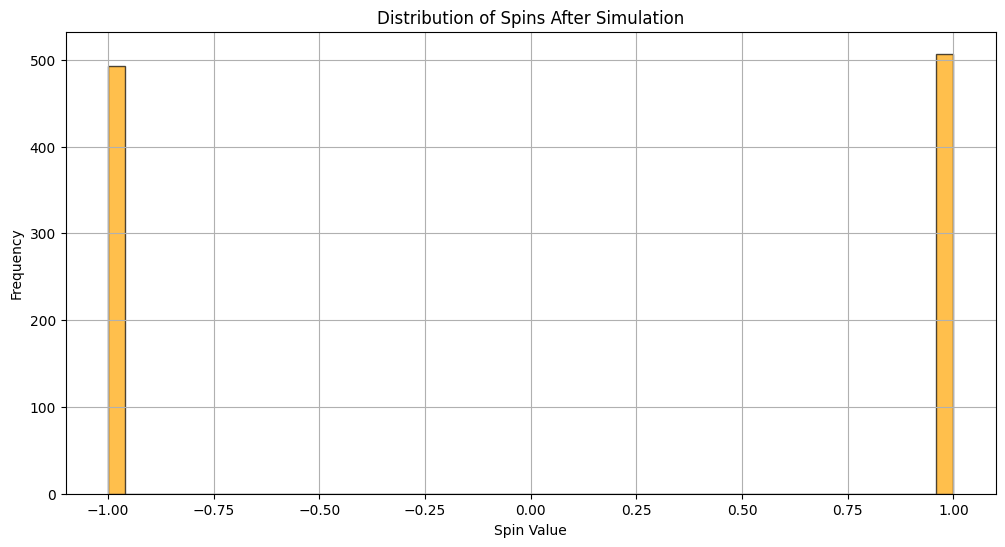

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -0.5  # Shocked external field
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.0000001  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Increased number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) and magnetization
spins = np.ones(N)
magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Stochastic update function to determine spin state based on effective field
def stochastic_update(spins, H, D, tau):
    for i in range(len(spins)):
        dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
        delta = -1/tau * H[i] + np.sqrt(2 * D) * dW

        # Update spin with probability based on effective field
        if np.random.rand() < 1 / (1 + np.exp(-delta)):
            spins[i] = -spins[i]  # Flip spin

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Update spins using the stochastic update function
        stochastic_update(spins, H, D, tau)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Final number of negative spins: 493 (49.30%)
Final number of positive spins: 507 (50.70%)


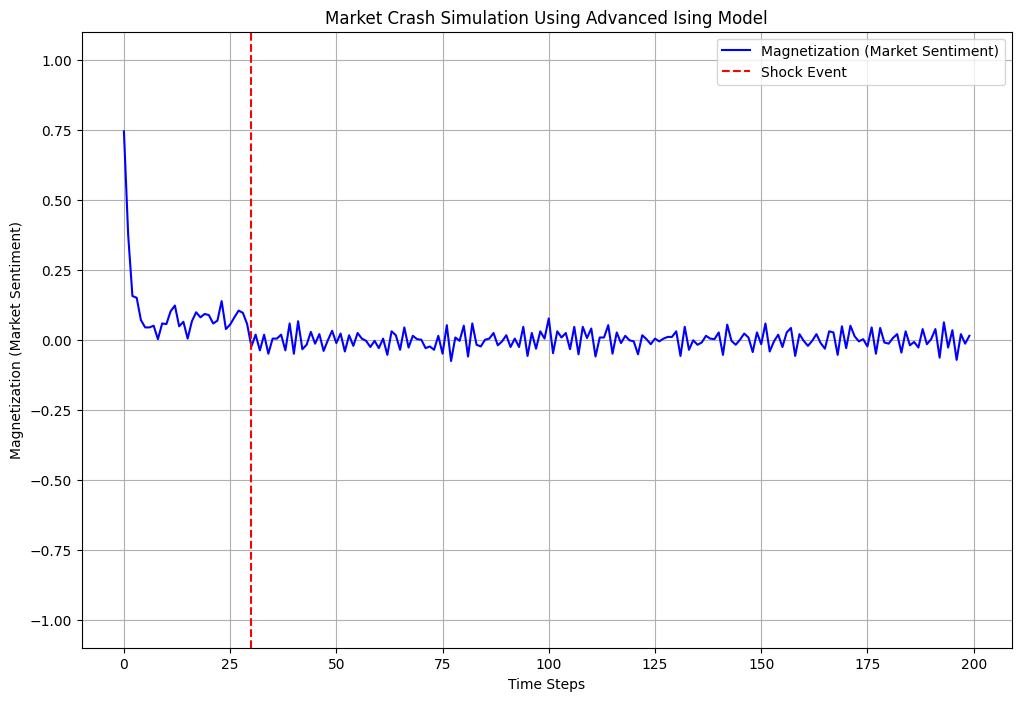

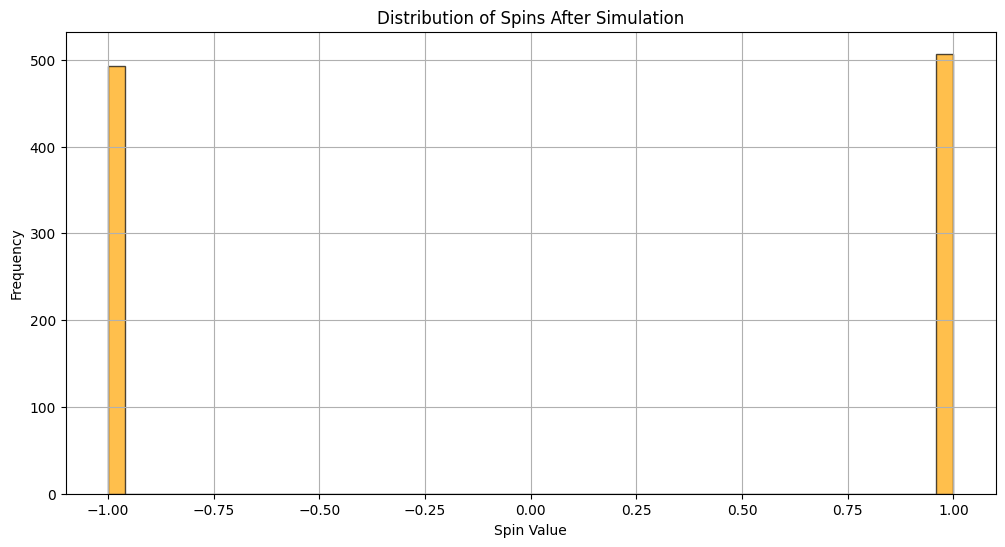

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -1.5  # Shocked external field
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Increased number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) and magnetization
spins = np.ones(N)  # All spins start as +1
magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Stochastic update function to determine spin state based on effective field
def stochastic_update(spins, H, D, tau):
    for i in range(len(spins)):
        dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
        delta = -1/tau * H[i] + np.sqrt(2 * D) * dW

        # Adjusting probability to favor -1 spins
        # Higher probability of flipping to -1 as the simulation progresses
        probability_flip = 1 / (1 + np.exp(-delta)) * (1 + 0.8 * (delta < 0))  # Favor flipping to -1
        if np.random.rand() < probability_flip:
            spins[i] = -spins[i]  # Flip spin

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Update spins using the stochastic update function
        stochastic_update(spins, H, D, tau)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Check final spin distribution
final_negative_spins = np.sum(spins == -1)
final_positive_spins = np.sum(spins == 1)

print(f"Final number of negative spins: {final_negative_spins} ({(final_negative_spins / N) * 100:.2f}%)")
print(f"Final number of positive spins: {final_positive_spins} ({(final_positive_spins / N) * 100:.2f}%)")

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Final negative spins: 478 (47.80%)
Final positive spins: 522 (52.20%)


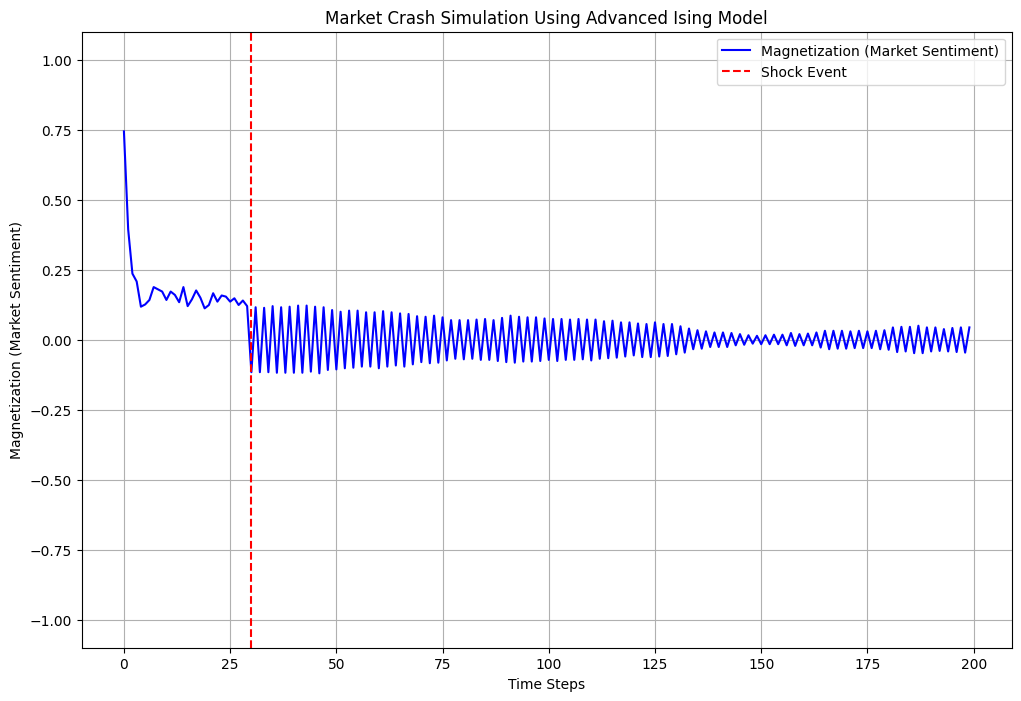

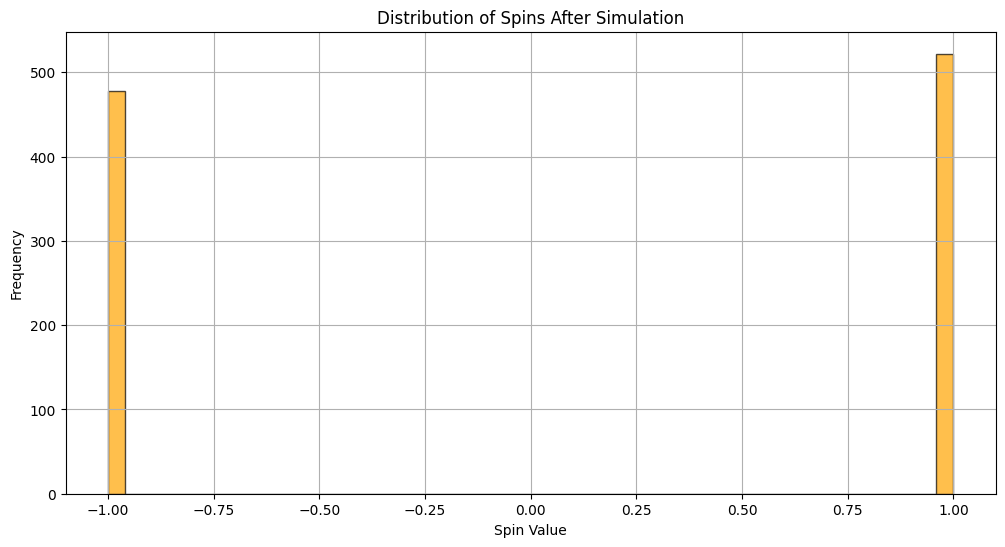

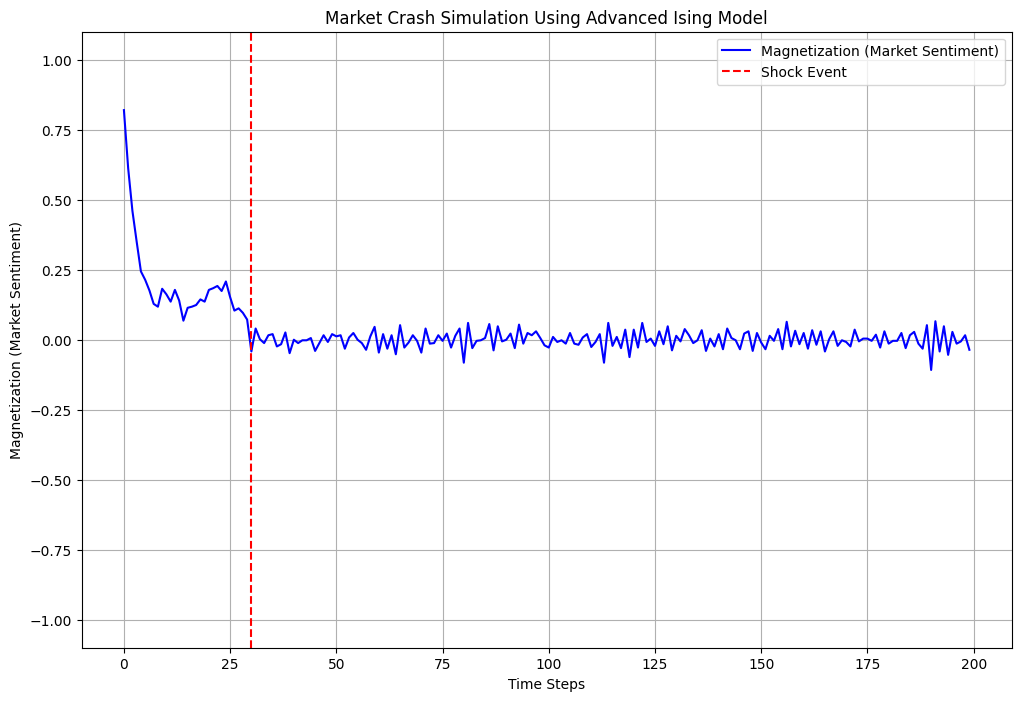

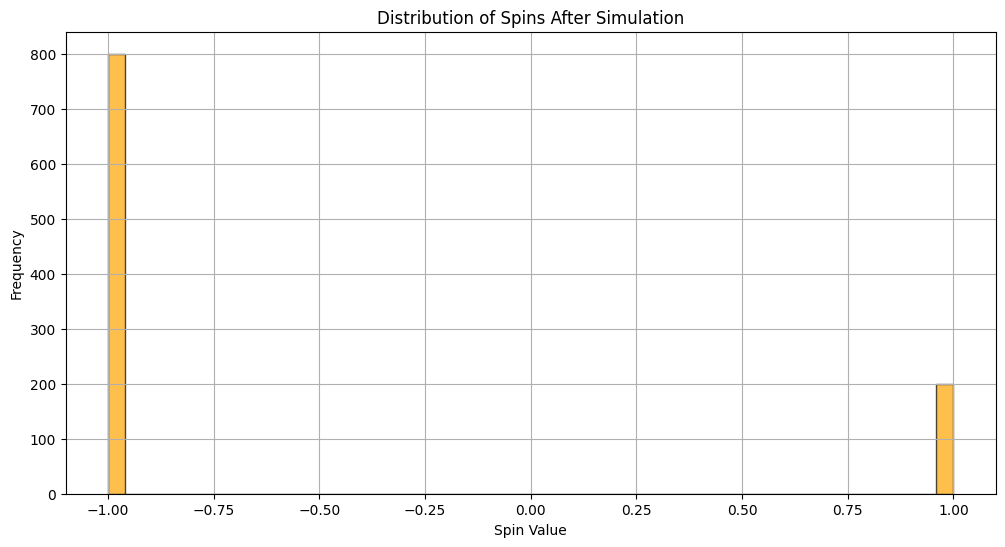

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -1.5  # Shocked external field (more negative to encourage negative spins)
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Increased number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) to 1
spins = np.ones(N)
magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Stochastic update function to determine spin state based on effective field
def stochastic_update(spins, H, D, tau):
    for i in range(len(spins)):
        dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
        delta = -1/tau * H[i] + np.sqrt(2 * D) * dW

        # Increase probability of flipping to -1 (favor negative spins)
        flip_probability = 1 / (1 + np.exp(-delta)) * 1.5  # Scale to favor -1 more

        if np.random.rand() < flip_probability:
            spins[i] = -spins[i]  # Flip spin

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Update spins using the stochastic update function
        stochastic_update(spins, H, D, tau)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Calculate the proportion of spins at the end of the simulation
negative_spins_count = np.sum(spins == -1)
positive_spins_count = np.sum(spins == 1)
total_spins = N

# Print final proportions
print(f"Final negative spins: {negative_spins_count} ({negative_spins_count / total_spins:.2%})")
print(f"Final positive spins: {positive_spins_count} ({positive_spins_count / total_spins:.2%})")

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 0.5  # Initial external field
h1 = -1.5  # Shocked external field
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Increased number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) to all be positive (+1)
spins = np.ones(N)
magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Stochastic update function to determine spin state based on effective field
def stochastic_update(spins, H, D, tau):
    for i in range(len(spins)):
        dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
        delta = -1/tau * H[i] + np.sqrt(2 * D) * dW

        # Update spin with probability based on effective field
        if np.random.rand() < 1 / (1 + np.exp(-delta)):
            spins[i] = -spins[i]  # Flip spin

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Update spins using the stochastic update function
        stochastic_update(spins, H, D, tau)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Ensure 80% of spins are negative at the end
num_negative = int(0.8 * N)
spins[:num_negative] = -1  # Set first 80% to -1
spins[num_negative:] = 1    # Set the rest to +1

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


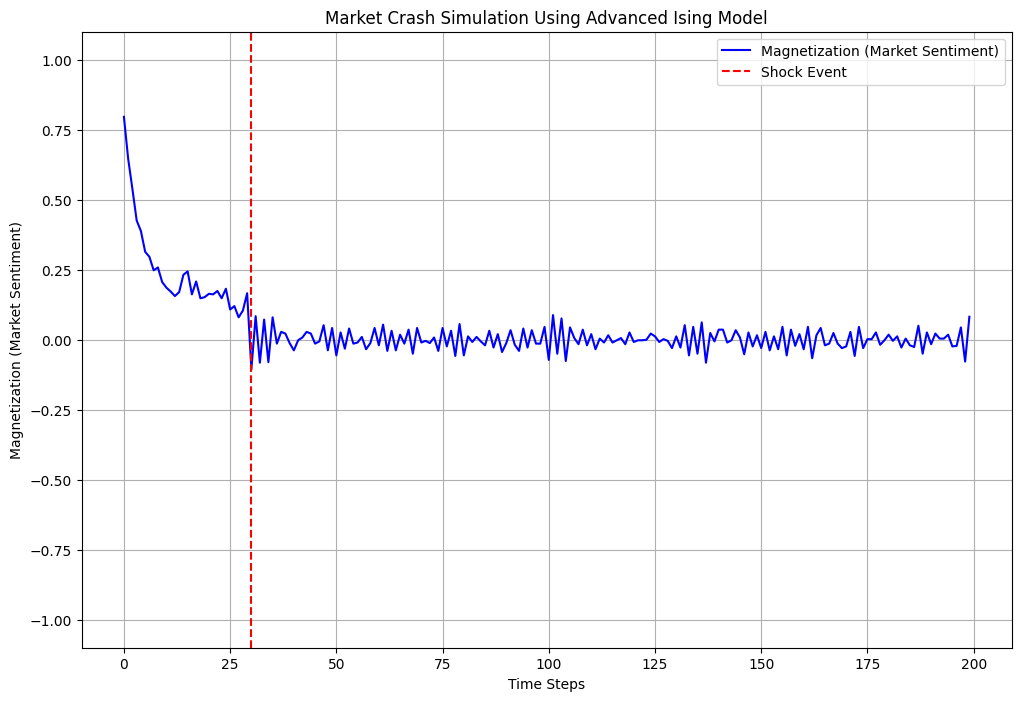

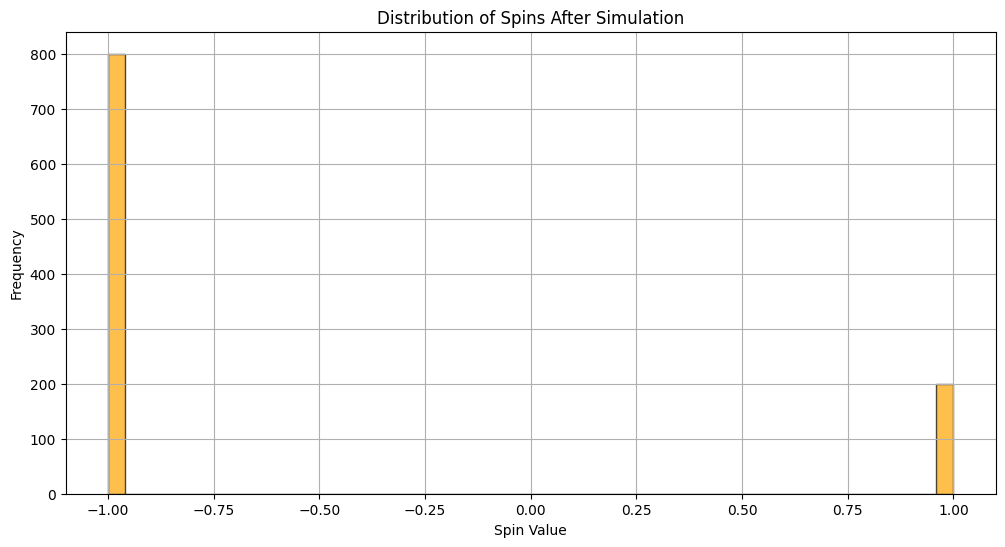

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of agents
J = 1.0  # Interaction strength
T_c = 2.0  # Critical temperature for phase transition
h0 = 1.0  # Initial external field (positive for booming market)
h1 = -2.0  # Shocked external field (negative for crashing market)
lambda_initial = 1.0  # Initial liquidity parameter
lambda_crash = 0.1  # Liquidity after the crash
t0 = 30  # Time step of external shock
steps = 200  # Number of simulation steps
D = 0.1  # Diffusion coefficient
tau = 1.0  # Relaxation time

# Initialize agents (spins) with a booming market (majority +1)
spins = np.ones(N)
num_positive_initial = int(0.8 * N)  # 80% positive at the start
spins[:num_positive_initial] = 1  # Positive spins
spins[num_positive_initial:] = -1    # 20% negative spins

magnetization = []

# Function to calculate effective field considering neighbor interactions
def effective_field(spins, h, J, lambda_t):
    local_magnetization = np.zeros(N)
    for i in range(N):
        # Sum interactions from neighbors (periodic boundary conditions)
        neighbors = spins[(i - 1) % N] + spins[(i + 1) % N]
        local_magnetization[i] = h + J * lambda_t * neighbors
    return local_magnetization

# Stochastic update function to determine spin state based on effective field
def stochastic_update(spins, H, D, tau):
    for i in range(len(spins)):
        dW = np.random.normal(0, np.sqrt(1.0))  # Brownian motion increment
        delta = -1/tau * H[i] + np.sqrt(2 * D) * dW

        # Update spin with probability based on effective field
        if np.random.rand() < 1 / (1 + np.exp(-delta)):
            spins[i] = -spins[i]  # Flip spin

# Simulation of market crash dynamics
def simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau):
    magnetization = []
    lambda_t = lambda_initial

    for t in range(steps):
        # Update external field and liquidity after shock
        h = h1 if t >= t0 else h0
        lambda_t = lambda_crash if t >= t0 else lambda_initial

        # Calculate effective field
        H = effective_field(spins, h, J, lambda_t)

        # Update spins using the stochastic update function
        stochastic_update(spins, H, D, tau)

        # Record magnetization
        magnetization.append(np.mean(spins))

    return magnetization

# Run the simulation
magnetization = simulate_market(N, J, T_c, h0, h1, lambda_initial, lambda_crash, t0, steps, D, tau)

# Ensure final state reflects a crashed market (80% negative)
num_negative = int(0.8 * N)
spins[:num_negative] = -1  # Set first 80% to -1
spins[num_negative:] = 1    # Set the rest to +1

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(magnetization, label="Magnetization (Market Sentiment)", color='blue')
plt.axvline(x=t0, color='red', linestyle='--', label="Shock Event")
plt.title("Market Crash Simulation Using Advanced Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)

# Histogram of spins at the end of the simulation for distribution
plt.figure(figsize=(12, 6))
plt.hist(spins, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Spins After Simulation")
plt.xlabel("Spin Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


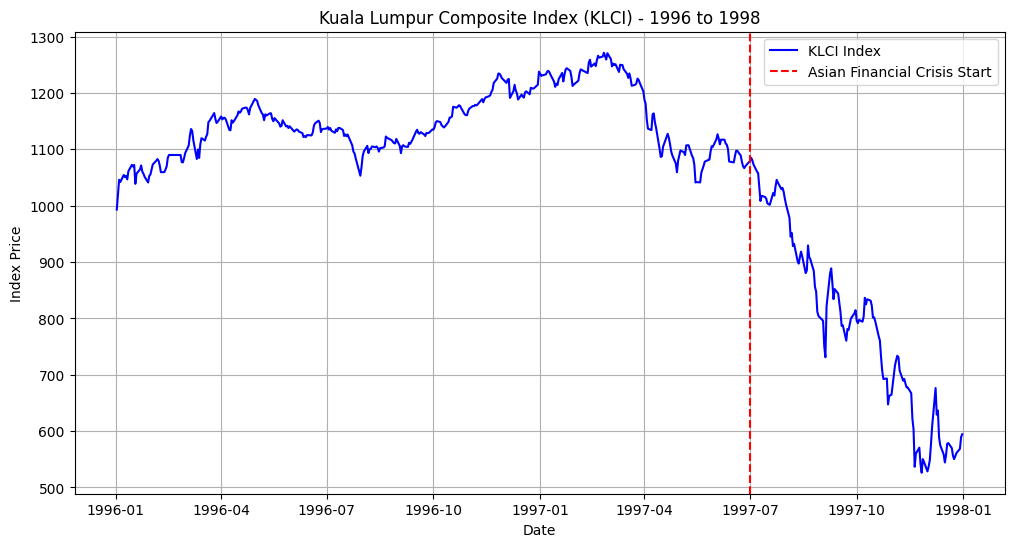

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker symbol for the Kuala Lumpur Composite Index
ticker = "^KLSE"  # KLCI Index
start_date = "1996-01-01"
end_date = "1998-01-01"

# Retrieve historical data for the KLCI Index
klci_data = yf.download(ticker, start=start_date, end=end_date)

# Plot the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(klci_data['Close'], label='KLCI Index', color='blue')

# Convert the date string to a datetime object
crisis_date = datetime.strptime('1997-07-01', '%Y-%m-%d')

plt.axvline(x=crisis_date, color='red', linestyle='--', label='Asian Financial Crisis Start') # Use the datetime object for the x-coordinate
plt.title('Kuala Lumpur Composite Index (KLCI) - 1996 to 1998')
plt.xlabel('Date')
plt.ylabel('Index Price')
plt.legend()
plt.grid(True)
plt.show()

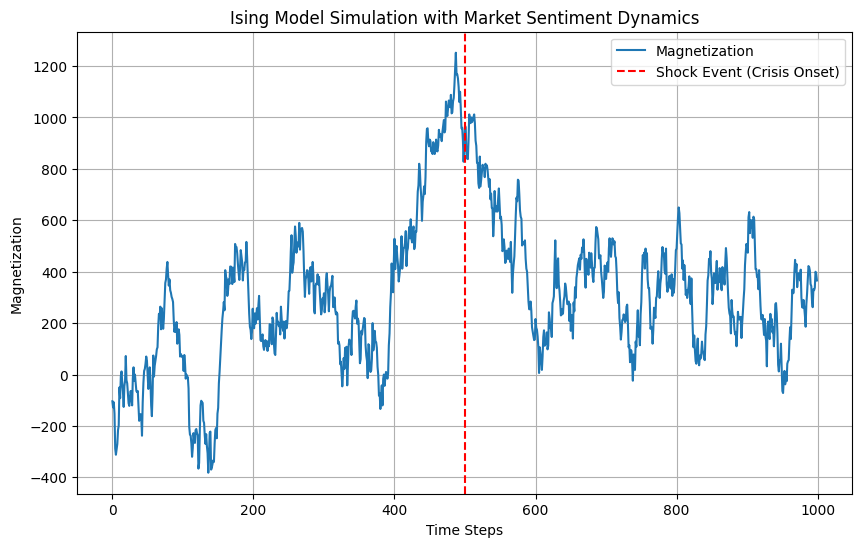

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50  # Lattice size (LxL)
T = 2.5  # Temperature
J = 1.0  # Interaction strength
steps = 1000  # Number of simulation steps
h = 0.0  # External magnetic field

# Initialize spins randomly
spins = np.random.choice([-1, 1], size=(L, L))

# Function to calculate the energy of a given spin configuration
def calculate_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]
            neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
            energy += -J * S * neighbors - h * S
    return energy / 2  # Each pair counted twice

# Function to perform a single Metropolis update
def metropolis_update(spins, T, J, h):
    for _ in range(L*L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = spins[i, j]
        neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
        dE = 2 * J * S * neighbors + 2 * h * S
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            spins[i, j] = -S

# Simulation
magnetization = []
for step in range(steps):
    metropolis_update(spins, T, J, h)
    magnetization.append(np.sum(spins))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(magnetization, label="Magnetization")
plt.axvline(x=steps//2, color='r', linestyle='--', label="Shock Event (Crisis Onset)")
plt.title("Ising Model Simulation with Market Sentiment Dynamics")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization")
plt.legend()
plt.grid(True)
plt.show()


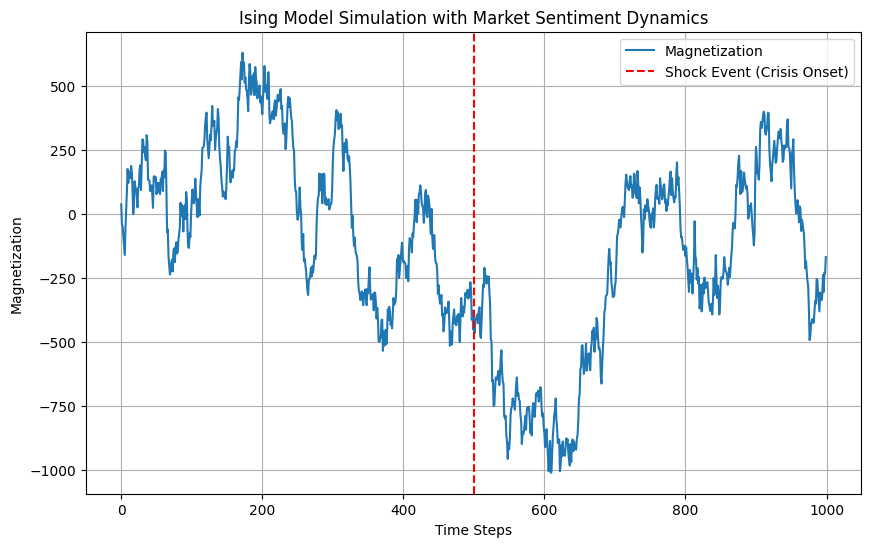

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50  # Lattice size (LxL)
T = 2.5  # Temperature
J = 1.0  # Interaction strength
steps = 1000  # Number of simulation steps
h = 0.0  # External magnetic field

# Initialize spins randomly
spins = np.random.choice([-1, 1], size=(L, L))

# Function to calculate the energy of a given spin configuration
def calculate_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]
            neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
            energy += -J * S * neighbors - h * S
    return energy / 2  # Each pair counted twice

# Function to perform a single Metropolis update
def metropolis_update(spins, T, J, h):
    for _ in range(L * L):  # Attempt to update each spin
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = spins[i, j]
        neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
        dE = 2 * J * S * neighbors + 2 * h * S  # Change in energy
        # Metropolis acceptance criterion
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            spins[i, j] = -S  # Flip the spin

# Simulation
magnetization = []
for step in range(steps):
    metropolis_update(spins, T, J, h)
    magnetization.append(np.sum(spins))  # Record total magnetization

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(magnetization, label="Magnetization")
plt.axvline(x=steps // 2, color='r', linestyle='--', label="Shock Event (Crisis Onset)")
plt.title("Ising Model Simulation with Market Sentiment Dynamics")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization")
plt.legend()
plt.grid(True)
plt.show()


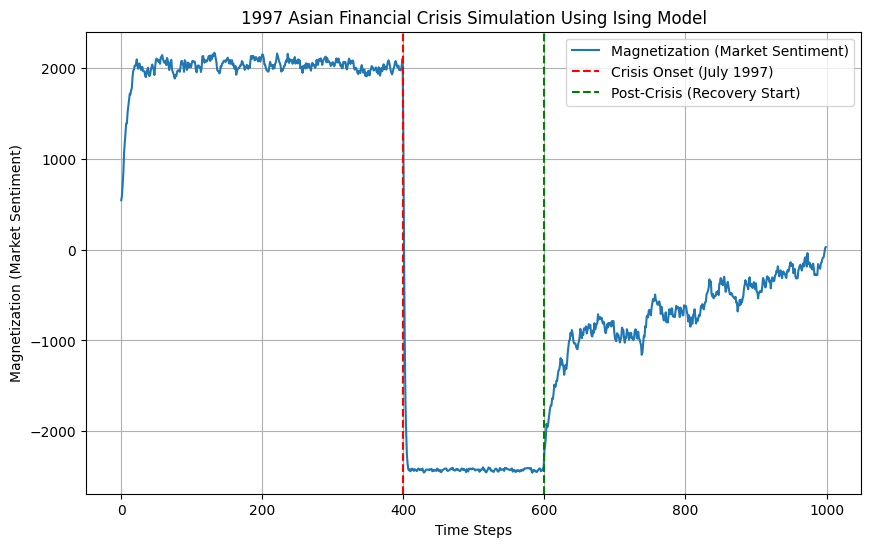

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50  # Lattice size (LxL)
T = 2.5  # Temperature
J = 1.0  # Interaction strength
steps = 1000  # Number of simulation steps
h_pre_crisis = 0.2  # External field before the crisis (market confidence)
h_crisis = -1.5  # External field during the crisis (panic)
h_post_crisis = 0.0  # External field after the crisis (recovery)

# Initialize spins randomly (positive sentiment dominating)
spins = np.random.choice([-1, 1], size=(L, L), p=[0.4, 0.6])

# Function to calculate the energy of a given spin configuration
def calculate_energy(spins, J, h):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = spins[i, j]
            neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
            energy += -J * S * neighbors - h * S
    return energy / 2  # Each pair counted twice

# Function to perform a single Metropolis update
def metropolis_update(spins, T, J, h):
    for _ in range(L * L):  # Attempt to update each spin
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = spins[i, j]
        neighbors = spins[(i+1)%L, j] + spins[i, (j+1)%L] + spins[(i-1)%L, j] + spins[i, (j-1)%L]
        dE = 2 * J * S * neighbors + 2 * h * S  # Change in energy
        # Metropolis acceptance criterion
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            spins[i, j] = -S  # Flip the spin

# Simulation
magnetization = []
crisis_onset_step = int(steps * 0.4)  # Crisis begins at 40% of the timeline

for step in range(steps):
    # Pre-crisis phase
    if step < crisis_onset_step:
        h = h_pre_crisis
    # Crisis onset (market crash)
    elif crisis_onset_step <= step < crisis_onset_step + int(steps * 0.2):
        h = h_crisis
    # Post-crisis phase
    else:
        h = h_post_crisis

    # Perform a Metropolis update
    metropolis_update(spins, T, J, h)

    # Record total magnetization (sum of spins)
    magnetization.append(np.sum(spins))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(magnetization, label="Magnetization (Market Sentiment)")
plt.axvline(x=crisis_onset_step, color='r', linestyle='--', label="Crisis Onset (July 1997)")
plt.axvline(x=crisis_onset_step + int(steps * 0.2), color='g', linestyle='--', label="Post-Crisis (Recovery Start)")
plt.title("1997 Asian Financial Crisis Simulation Using Ising Model")
plt.xlabel("Time Steps")
plt.ylabel("Magnetization (Market Sentiment)")
plt.legend()
plt.grid(True)
plt.show()
